In [271]:
import numpy as np
import matplotlib.pyplot as plt

In [424]:
data1 = np.loadtxt('2ddata.csv',delimiter=',')

In [425]:
data1[1:5,:]

array([[-23.62351858,  -2.58565473],
       [-22.3837988 ,  -9.19076943],
       [-15.14141633,   2.4201547 ],
       [ 48.78311939,  33.99720644]])

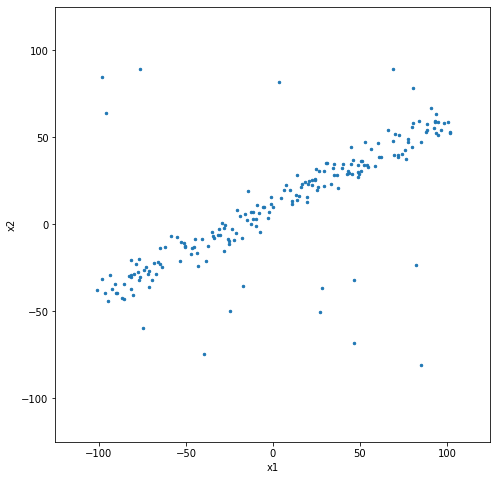

In [274]:
plt.figure(figsize=(8,8))
plt.scatter(data1[:,[0]],data1[:,[1]],s=6)
plt.xlim(-125,125)
plt.ylim(-125,125)
plt.xlabel("x1")
plt.ylabel("x2")
plt.gca().set_aspect('equal',adjustable='box')

# Step 1: Mean centering

In [417]:
mean = np.mean(data1,axis=0)
data = data1 - np.mean(data1,axis=0)
newMean = np.mean(data,axis=0)
data.shape

(200, 2)

In [418]:
newMean

array([-7.46069873e-16, -5.68434189e-16])

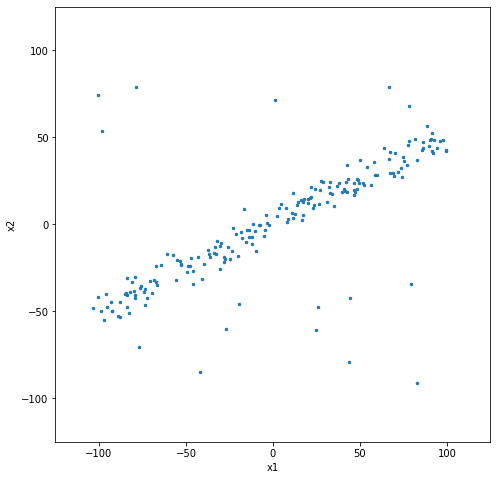

In [276]:
plt.figure(figsize=(8,8))
plt.scatter(data[:,[0]],data[:,[1]],s=6)
plt.xlim(-125,125)
plt.ylim(-125,125)
plt.xlabel("x1")
plt.ylabel("x2")
plt.gca().set_aspect('equal',adjustable='box')

# Step 2: Covariance matrix,  X^TX 

In [277]:
data[1:5,:]

array([[-26.03332296, -13.02612402],
       [-24.79360318, -19.63123872],
       [-17.55122071,  -8.02031459],
       [ 46.37331501,  23.55673715]])

In [278]:
cov = np.cov(data.T)

In [279]:
cov

array([[3407.31086688, 1473.06388942],
       [1473.06388942, 1169.53151002]])

# Step 3: Eigen decomposition of covariance matrix, X^TX

In [429]:
cov = (data.T @ data)/(data.shape[0]-1)
cov

array([[3407.31086688, 1473.06388942],
       [1473.06388942, 1169.53151002]])

In [337]:
eig_vals, eig_vecs = np.linalg.eig(cov)

In [338]:
eig_vals

array([4138.2404593,  438.6019176])

In [283]:
eig_vecs

array([[ 0.89578578, -0.44448604],
       [ 0.44448604,  0.89578578]])

In [428]:
#SVD
u,s,v=np.linalg.svd(cov)
v

array([[-0.89578578, -0.44448604],
       [-0.44448604,  0.89578578]])

# Step 4: Principal Components

In [284]:
pc = np.array([eig_vecs[:,0]*np.sqrt(eig_vals[0]),eig_vecs[:,1]*np.sqrt(eig_vals[1])])
pc

array([[57.62514411, 28.59341228],
       [-9.30879332, 18.76028477]])

In [362]:
pc1 = pc[0,:] 
pc1

array([57.62514411, 28.59341228])

In [363]:
pc2 = pc[1,:]
pc2

array([-9.30879332, 18.76028477])

In [364]:
mean

array([ 2.40980438, 10.44046929])

In [365]:
mean[0]

2.4098043837499996

In [366]:
pc[:,0]

array([57.62514411, -9.30879332])

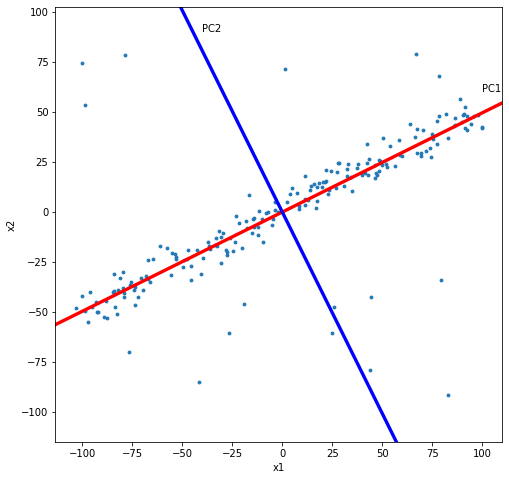

In [434]:


plt.figure(figsize=(8,8))
plt.scatter(data[:,[0]],data[:,[1]],s=8)
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-125, 125)
plt.ylim(-125, 125)
plt.gca().set_aspect('equal', adjustable='box')
# principal component
plt.quiver(*newMean,*pc1*100,scale=1,color=['r'],scale_units='xy')
plt.quiver(*newMean,*pc1*(-100),scale=1,color=['r'],scale_units='xy')
plt.quiver(*newMean,*pc2*100,scale=1,color=['b'],scale_units='xy')
plt.quiver(*newMean,*pc2*(-100),scale=1,color=['b'],scale_units='xy')
# plt.quiver(*newMean,*pc1,scale=1,color=['r'],scale_units='xy')
# plt.quiver(*newMean,*pc2,scale=1,color=['b'],scale_units='xy')
plt.text(100,60,'PC1')
plt.text(-40,90,'PC2')
plt.axis('equal')
plt.show()

In [227]:
np.shape(data)

(200, 2)

In [82]:
np.shape(pc)

(2, 2)

# Step 5: Project data onto principal components

In [83]:
newData = pc @ data.T

In [84]:
np.shape(newData)

(2, 200)

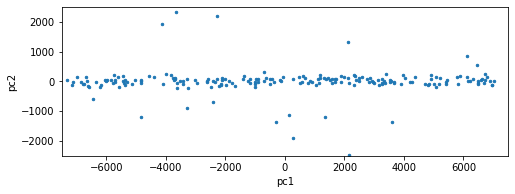

In [401]:
plt.figure(figsize=(8,8))
plt.scatter(newData[0,:],newData[1,:],s=6)
plt.xlim(-7500,7500)
plt.ylim(-2500,2500)
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.gca().set_aspect('equal',adjustable='box')
plt.show()

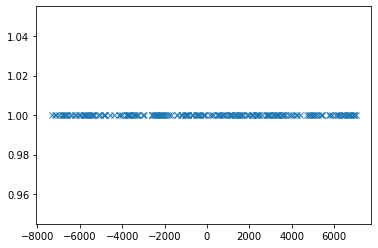

In [400]:
plt.plot(newData[0,:], len(newData[0,:])*[1] , "x")